In [211]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [212]:
df = pd.read_csv('prices_bitcoin.csv')

In [213]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,"Apr 25, 2018","9,701.03","9,745.32","8,799.84","8,845.74","11,083,100,000","164,893,000,000"
1,1,"Apr 24, 2018","8,934.34","9,732.61","8,927.83","9,697.50","10,678,800,000","151,844,000,000"
2,2,"Apr 23, 2018","8,794.39","8,958.55","8,788.81","8,930.88","6,925,190,000","149,448,000,000"
3,3,"Apr 22, 2018","8,925.06","9,001.64","8,779.61","8,802.46","6,629,900,000","151,651,000,000"
4,4,"Apr 21, 2018","8,848.79","8,997.57","8,652.15","8,895.58","7,548,550,000","150,337,000,000"


In [214]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [215]:
df['Date']= pd.to_datetime(df['Date'])

In [217]:
df.sort_values(by='Date',inplace=True)
df.reset_index(drop=True,inplace=True)

In [219]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [220]:
%matplotlib inline

In [222]:
df_test1 = df[(df['Date']>dt.datetime(2014,12,31))&(df['Date']<dt.datetime(2018,1,1))]
df_test1.reset_index(drop=True,inplace=True)

In [223]:
df_test1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2015-01-01,320.44,320.44,314.00,314.25,"8,036,550","4,380,820,000"
1,2015-01-02,314.08,315.84,313.57,315.03,"7,860,650","4,295,210,000"
2,2015-01-03,314.85,315.15,281.08,281.08,"33,054,400","4,307,010,000"
3,2015-01-04,281.15,287.23,257.61,264.20,"55,629,100","3,847,150,000"
4,2015-01-05,265.08,278.34,265.08,274.47,"43,962,800","3,628,490,000"


In [224]:
df_test1['Volume']=df_test1['Volume'].apply(lambda x: float(x.replace(',','')))
df_test1['Close']=df_test1['Close'].apply(lambda x: float(x.replace(',','')))
df_test1['Market Cap']=df_test1['Market Cap'].apply(lambda x: float(x.replace(',','')))

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

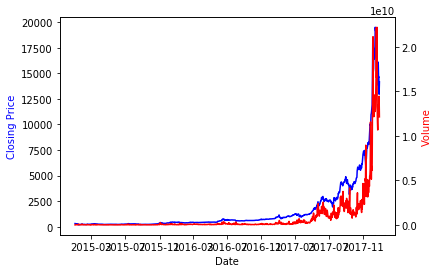

In [225]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price',color='blue')
ax1.plot(df_test1['Date'],df_test1['Close'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Volume', color = "red")
ax2.plot(df_test1['Date'],df_test1['Volume'],color='red')
plt.show()

In [227]:
from twitter_clean import *

In [228]:
df_tweets = pd.read_json('new_cleaned.json',lines=True)

In [229]:
df_tweets.drop('_id',axis=1,inplace=True)

In [230]:
df_tweets.sort_values(by='time',inplace=True)
df_tweets.reset_index(drop=True,inplace=True)

In [231]:
df_tweets.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,1 Apr 2015
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,1 Apr 2015
2,15,en,1,16,the bitshares hq designed by is looking great!,1 Apr 2015
3,1,en,,1,current price is a joke!,1 Apr 2015
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,1 Apr 2015


In [232]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32218 entries, 0 to 32217
Data columns (total 6 columns):
favorite    32218 non-null object
language    32218 non-null object
reply       32218 non-null object
retweet     32218 non-null object
text        32218 non-null object
time        32218 non-null object
dtypes: object(6)
memory usage: 1.5+ MB


In [233]:
import datetime as dt
df_tweets['time']=pd.to_datetime(df_tweets['time'])

In [238]:
df_tweets.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,2015-04-01
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,2015-04-01
2,15,en,1,16,the bitshares hq designed by is looking great!,2015-04-01
3,1,en,,1,current price is a joke!,2015-04-01
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,2015-04-01


In [239]:
df_tweets_test = df_tweets[(df_tweets['time']>dt.datetime(2014,12,31))&(df_tweets['time']<dt.datetime(2018,1,2))]

In [240]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,2015-04-01
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,2015-04-01
2,15,en,1,16,the bitshares hq designed by is looking great!,2015-04-01
3,1,en,,1,current price is a joke!,2015-04-01
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,2015-04-01


In [241]:
df_tweets_test.sort_values(by='time',inplace=True)

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
379,1,en,,,gets its first tv ads: â â€¦,2015-01-01
395,1,en,1,,tech 2015: block chain will break free from bi...,2015-01-01
394,2,en,,4,bitcoin marketing in 2015 should focus on cons...,2015-01-01
393,3,en,,2,rt : 's future lies in the billions of underba...,2015-01-01
392,1,en,,2,new post how one startup wants to reimagine bi...,2015-01-01


In [243]:
df_tweets_test.reset_index(drop=True,inplace=True)

In [244]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
0,1,en,,,gets its first tv ads: â â€¦,2015-01-01
1,1,en,1,,tech 2015: block chain will break free from bi...,2015-01-01
2,2,en,,4,bitcoin marketing in 2015 should focus on cons...,2015-01-01
3,3,en,,2,rt : 's future lies in the billions of underba...,2015-01-01
4,1,en,,2,new post how one startup wants to reimagine bi...,2015-01-01


In [247]:
df_tweets_test_text = pd.pivot_table(df_tweets_test, index=['time'],values=['text'],aggfunc=lambda x: ' '.join(x))

In [249]:
df_tweets_test_text['text']=df_tweets_test_text['text'].apply(lambda x:str(x))

In [250]:
df_tweets_test_text.head()

,text
time,
2015-01-01,gets its first tv ads: â â€¦ tech 2015: block ...
2015-01-02,isg3d sells 3d printers and offers 3d printing...
2015-01-03,we have opened vs market â wish you happy trad...
2015-01-04,i assume more tweets about bitcoin have been e...
2015-01-05,watches designed for our bitcoin family! | wat...


In [251]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [252]:
def sentence_sentiment(string):
    sent = analyser.polarity_scores(string)
    return sent

In [254]:
df_tweets_test_text['Sentiment']=df_tweets_test_text['text'].apply(sentence_sentiment)

In [257]:
df_tweets_test_text.reset_index(inplace=True)

In [258]:
df_tweets_test_text = pd.concat([df_tweets_test_text.drop(['Sentiment'], axis=1), df_tweets_test_text['Sentiment'].apply(pd.Series)], axis=1)

In [259]:
from sklearn import preprocessing

x = df_test1[['Volume']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test1=pd.concat([df_test1.drop('Volume',axis=1),pd.DataFrame(x_scaled,columns=['Volume_scaled'])],axis=1)
#df_test1['Volume_scaled'] = pd.DataFrame(x_scaled)

In [260]:
df_test1.head()

,Date,Open,High,Low,Close,Market Cap,Volume_scaled
0,2015-01-01,320.44,320.44,314.00,314.25,4.380820e+09,0.000008
1,2015-01-02,314.08,315.84,313.57,315.03,4.295210e+09,0.000000
2,2015-01-03,314.85,315.15,281.08,281.08,4.307010e+09,0.001135
3,2015-01-04,281.15,287.23,257.61,264.20,3.847150e+09,0.002153
4,2015-01-05,265.08,278.34,265.08,274.47,3.628490e+09,0.001627


In [261]:
x = df_test1[['Close']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test1=pd.concat([df_test1.drop('Close',axis=1),pd.DataFrame(x_scaled,columns=['Close_scaled'])],axis=1)

In [262]:
df_test1.drop('Open',axis=1,inplace=True)
df_test1.drop('High',axis=1,inplace=True)
df_test1.drop('Low',axis=1,inplace=True)
df_test1.drop('Market Cap',axis=1,inplace=True)

In [263]:
df_test1.head()

,Date,Volume_scaled,Close_scaled
0,2015-01-01,0.000008,0.007047
1,2015-01-02,0.000000,0.007088
2,2015-01-03,0.001135,0.005330
3,2015-01-04,0.002153,0.004457
4,2015-01-05,0.001627,0.004988


In [264]:
df_tweets_test_text.head()

,time,text,compound,neg,neu,pos
0,2015-01-01,gets its first tv ads: â â€¦ tech 2015: block ...,0.9729,0.077,0.782,0.141
1,2015-01-02,isg3d sells 3d printers and offers 3d printing...,0.4268,0.069,0.845,0.087
2,2015-01-03,we have opened vs market â wish you happy trad...,0.9921,0.097,0.722,0.181
3,2015-01-04,i assume more tweets about bitcoin have been e...,0.4230,0.104,0.786,0.110
4,2015-01-05,watches designed for our bitcoin family! | wat...,0.9620,0.020,0.897,0.083


In [265]:
df_tweets_test_text.columns = ['Date','Tweets','Compound','Negative','Neutral','Positive']

In [266]:
merged_data = pd.merge(left=df_test1,right=df_tweets_test_text,on='Date',how='outer')

In [267]:
merged_data.sort_values(by='Date',inplace=True)

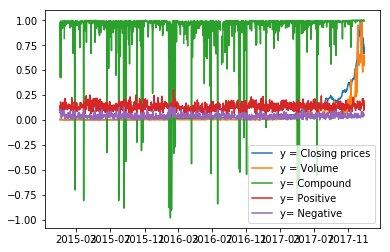

In [268]:
plt.plot(merged_data['Date'],merged_data['Close_scaled'])
plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data['Date'],merged_data['Compound'])
plt.plot(merged_data['Date'],merged_data['Positive'])
plt.plot(merged_data['Date'],merged_data['Negative'])
plt.legend(['y = Closing prices','y = Volume','y= Compound','y= Positive','y= Negative'],loc='lower right')
plt.show()

In [269]:
df_tweets_values = pd.DataFrame(df_tweets_test['time'].value_counts())

In [270]:
df_tweets_values.sort_index(inplace=True)

In [271]:
df_tweets_values.reset_index(inplace=True)
df_tweets_values.columns=['Date','count']

In [272]:
df_tweets_values.head()

,Date,count
0,2015-01-01,31
1,2015-01-02,27
2,2015-01-03,37
3,2015-01-04,30
4,2015-01-05,26


In [273]:
merged_data.head()

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦ tech 2015: block ...,0.9729,0.077,0.782,0.141
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,0.4268,0.069,0.845,0.087
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,0.9921,0.097,0.722,0.181
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,0.4230,0.104,0.786,0.110
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,0.9620,0.020,0.897,0.083


In [274]:
merged_data=merged_data.merge(df_tweets_values,on='Date')

In [275]:
merged_data.head()

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦ tech 2015: block ...,0.9729,0.077,0.782,0.141,31
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,0.4268,0.069,0.845,0.087,27
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,0.9921,0.097,0.722,0.181,37
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,0.4230,0.104,0.786,0.110,30
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,0.9620,0.020,0.897,0.083,26


In [276]:
merged_data['Negative_m']=merged_data.apply(lambda row: row['Negative']*int(row['count']),axis=1)
merged_data['Neutral_m']=merged_data.apply(lambda row: row['Neutral']*int(row['count']),axis=1)
merged_data['Positive_m']=merged_data.apply(lambda row: row['Positive']*int(row['count']),axis=1)
merged_data['Compound']=merged_data.apply(lambda row: row['Compound']*int(row['count']),axis=1)

In [277]:
merged_data

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count,Negative_m,Neutral_m,Positive_m
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦ tech 2015: block ...,30.1599,0.077,0.782,0.141,31,2.387,24.242,4.371
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,11.5236,0.069,0.845,0.087,27,1.863,22.815,2.349
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,36.7077,0.097,0.722,0.181,37,3.589,26.714,6.697
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,12.6900,0.104,0.786,0.110,30,3.120,23.580,3.300
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,25.0120,0.020,0.897,0.083,26,0.520,23.322,2.158
5,2015-01-06,0.000693,0.005595,keeping score at the 2014 bitcoin bowl: by chr...,31.2704,0.019,0.882,0.099,32,0.608,28.224,3.168
6,2015-01-07,0.000766,0.006017,together! never change a winning team! don't m...,28.7280,0.091,0.768,0.142,30,2.730,23.040,4.260
7,2015-01-08,0.000546,0.005448,mining now! ~14 days left for pow add a pool t...,28.7390,0.037,0.806,0.157,29,1.073,23.374,4.553
8,2015-01-09,0.000489,0.005813,shooting commercial video for stories from the...,25.2980,0.035,0.856,0.109,26,0.910,22.256,2.834
9,2015-01-10,0.000334,0.005005,"banksâ€¦ most subsidized industry in us, also ...",28.4425,0.069,0.837,0.094,31,2.139,25.947,2.914


In [278]:
x = merged_data[['Negative_m']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Negative_scaled'])],axis=1)
x = merged_data[['Neutral_m']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Netral_scaled'])],axis=1)
x = merged_data[['Positive_m']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Positive_scaled'])],axis=1)
x = merged_data[['Compound']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Compound_scaled'])],axis=1)

In [282]:
merged_data

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count,Negative_m,Neutral_m,Positive_m,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦ tech 2015: block ...,30.1599,0.077,0.782,0.141,31,2.387,24.242,4.371,0.303227,0.265602,0.249278,0.500705
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,11.5236,0.069,0.845,0.087,27,1.863,22.815,2.349,0.236662,0.245821,0.127617,0.365498
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,36.7077,0.097,0.722,0.181,37,3.589,26.714,6.697,0.455920,0.299870,0.389230,0.548210
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,12.6900,0.104,0.786,0.110,30,3.120,23.580,3.300,0.396341,0.256425,0.184838,0.373960
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,25.0120,0.020,0.897,0.083,26,0.520,23.322,2.158,0.066057,0.252849,0.116125,0.463357
5,2015-01-06,0.000693,0.005595,keeping score at the 2014 bitcoin bowl: by chr...,31.2704,0.019,0.882,0.099,32,0.608,28.224,3.168,0.077236,0.320802,0.176895,0.508762
6,2015-01-07,0.000766,0.006017,together! never change a winning team! don't m...,28.7280,0.091,0.768,0.142,30,2.730,23.040,4.260,0.346799,0.248940,0.242599,0.490317
7,2015-01-08,0.000546,0.005448,mining now! ~14 days left for pow add a pool t...,28.7390,0.037,0.806,0.157,29,1.073,23.374,4.553,0.136306,0.253570,0.260229,0.490396
8,2015-01-09,0.000489,0.005813,shooting commercial video for stories from the...,25.2980,0.035,0.856,0.109,26,0.910,22.256,2.834,0.115600,0.238071,0.156799,0.465432
9,2015-01-10,0.000334,0.005005,"banksâ€¦ most subsidized industry in us, also ...",28.4425,0.069,0.837,0.094,31,2.139,25.947,2.914,0.271723,0.289237,0.161613,0.488245


In [285]:
merged_data.drop(['Compound','Negative','Neutral','Positive','count','Negative_m','Neutral_m','Positive_m'],axis=1,inplace=True)

In [296]:
merged_data.index = pd.to_datetime(merged_data.pop('Date'))

In [298]:
merged_data.head()

,Volume_scaled,Close_scaled,Tweets,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled
Date,,,,,,,
2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦ tech 2015: block ...,0.303227,0.265602,0.249278,0.500705
2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,0.236662,0.245821,0.127617,0.365498
2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,0.455920,0.299870,0.389230,0.548210
2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,0.396341,0.256425,0.184838,0.373960
2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,0.066057,0.252849,0.116125,0.463357


In [329]:
merged_data['Comp_ewma']=pd.ewma(merged_data['Compound_scaled'], span=30, freq="D")
merged_data['Posi_ewma']=pd.ewma(merged_data['Positive_scaled'], span=30, freq="D")
merged_data['Nega_ewma']=pd.ewma(merged_data['Negative_scaled'], span=30, freq="D")

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,ignore_na=False,span=30,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,ignore_na=False,span=30,min_periods=0,adjust=True).mean()
  
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,ignore_na=False,span=30,min_periods=0,adjust=True).mean()
  This is separate from the ipykernel package so we can avoid doing imports u

In [337]:
merged_data.corr()

,Volume_scaled,Close_scaled,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled,Comp_ewma,Posi_ewma,Nega_ewma
Volume_scaled,1.000000,0.935293,0.428176,0.575061,0.525601,0.513197,0.850369,0.871463,0.686542
Close_scaled,0.935293,1.000000,0.359555,0.574533,0.507987,0.515975,0.888692,0.885313,0.690202
Negative_scaled,0.428176,0.359555,1.000000,0.509128,0.437758,0.331386,0.344442,0.368639,0.517862
Netral_scaled,0.575061,0.574533,0.509128,1.000000,0.763778,0.856375,0.625106,0.589758,0.489073
Positive_scaled,0.525601,0.507987,0.437758,0.763778,1.000000,0.814970,0.549661,0.607940,0.414148
Compound_scaled,0.513197,0.515975,0.331386,0.856375,0.814970,1.000000,0.609616,0.564248,0.383848
Comp_ewma,0.850369,0.888692,0.344442,0.625106,0.549661,0.609616,1.000000,0.915429,0.632275
Posi_ewma,0.871463,0.885313,0.368639,0.589758,0.607940,0.564248,0.915429,1.000000,0.676272
Nega_ewma,0.686542,0.690202,0.517862,0.489073,0.414148,0.383848,0.632275,0.676272,1.000000


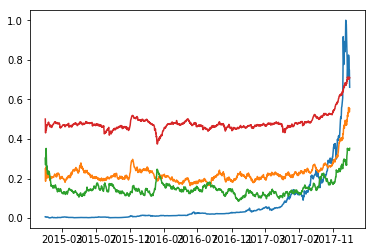

In [331]:
plt.plot(merged_data.index,merged_data['Close_scaled'])
# plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data.index,merged_data['Posi_ewma'])
plt.plot(merged_data.index,merged_data['Nega_ewma'])
plt.plot(merged_data.index,merged_data['Comp_ewma'])
# plt.plot(merged_data['Date'],merged_data['Positive_scaled'])
# plt.plot(merged_data['Date'],merged_data['Negative_scaled'])
#plt.legend(['y = Closing prices','y = Volume','y= Compound','y= Positive','y= Negative'],loc='lower right')
plt.show()

In [350]:
X=merged_data['Close_scaled'].values
split=len(X)/2
X1,X2 = X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2,var()

NameError: name 'var' is not defined

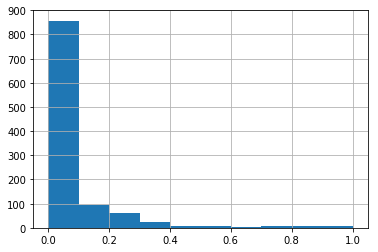

In [338]:
merged_data['Close_scaled'].hist()

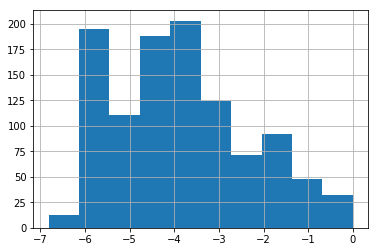

In [340]:
from numpy import log
merged_data['Log_close']=log(merged_data['Close_scaled'])
merged_data['Log_close'].hist()


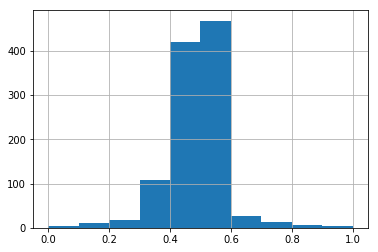

In [343]:
merged_data['Compound_scaled'].hist()

In [345]:
merged_data1=merged_data[merged_data['Compound_scaled']>0]

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


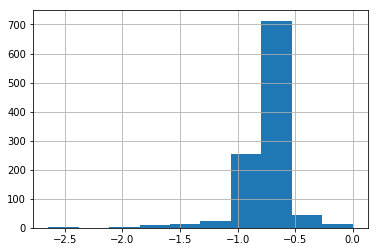

In [346]:
merged_data1['Log_Comp']=log(merged_data1['Compound_scaled'])
merged_data1['Log_Comp'].hist()

In [56]:
merged_data = merged_data[merged_data['Date']>dt.datetime(2017,12,1)]

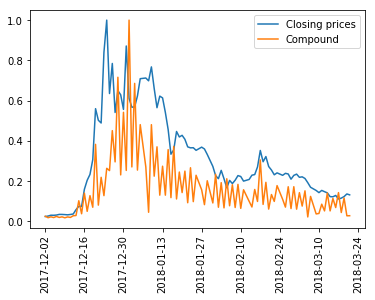

In [100]:
plt.plot(merged_data['Date'],merged_data['Close_scaled'])
# plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data['Date'],merged_data['Compound_scaled'])
# plt.plot(merged_data['Date'],merged_data['Positive_scaled'])
# plt.plot(merged_data['Date'],merged_data['Negative_scaled'])
plt.legend(['Closing prices','Compound'],loc='upper right')#,'Positive','Negative'
plt.xticks(rotation=90)
plt.show()

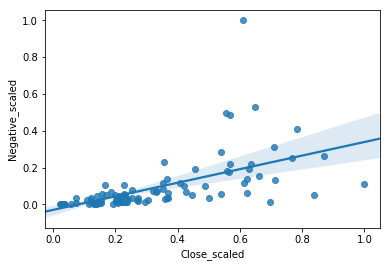

In [81]:
fig, ax = plt.subplots()

sns.regplot(x='Close_scaled',y='Negative_scaled',data=merged_data)

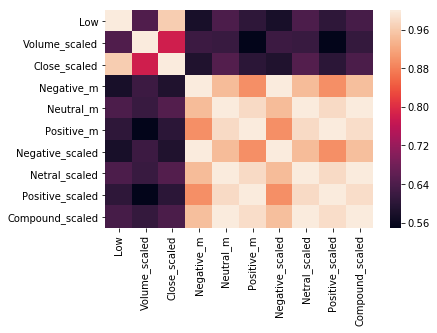

In [59]:
import seaborn as sns
merged_data_test = merged_data.drop(['Open','High','Close','Volume','Neutral','Positive','Compound','Negative','count'],axis=1)
corr=merged_data_test.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [63]:
merged_data.reset_index(drop=True, inplace=True)

In [64]:
merged_data.isnull().any()

Date               False
Open               False
High               False
Low                False
Close              False
Volume             False
Market Cap         False
Volume_scaled      False
Close_scaled       False
Tweets             False
Compound           False
Negative           False
Neutral            False
Positive           False
count              False
Negative_m         False
Neutral_m          False
Positive_m         False
Negative_scaled    False
Netral_scaled      False
Positive_scaled    False
Compound_scaled    False
dtype: bool

In [65]:
from pandas.plotting import lag_plot

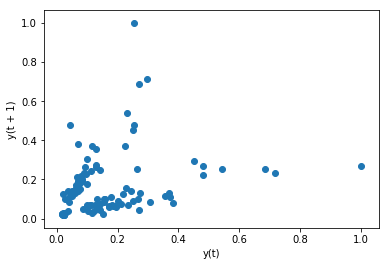

In [68]:
lag_plot(merged_data['Compound_scaled'])

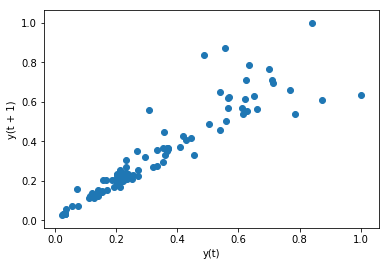

In [69]:
lag_plot(merged_data['Close_scaled'])

In [90]:
merged_data['Pct Change'] = merged_data['Close'].pct_change()

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
merged_data.dropna(how='any',inplace=True)
x=merged_data[['Pct Change']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Pct_scaled'])],axis=1)


C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
merged_data

,Date,Open,High,Low,Close,Volume,Market Cap,Volume_scaled,Close_scaled,Tweets,...,count,Negative_m,Neutral_m,Positive_m,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled,Pct Change,Pct_scaled
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302000
1,2017-12-03,0.006136,0.007735,0.005979,0.006723,5592120.0,"87,978,200",0.005686,0.026033,there is a lot of potential in verge... it has...,...,15.0,0.315,13.335,1.350,0.000650,0.003903,0.001777,0.017828,0.094951,0.345153
2,2017-12-04,0.006855,0.008185,0.006656,0.007803,7735120.0,"98,308,300",0.007869,0.030262,sigue por encima de la barrera de los 10000$ p...,...,36.0,2.052,29.952,3.996,0.004233,0.008767,0.005260,0.022370,0.160643,0.233732
3,2017-12-05,0.007919,0.008584,0.007314,0.007733,6136980.0,"113,601,000",0.006241,0.029988,yoooo close to 9k thank you for your steady su...,...,19.0,1.159,15.903,1.938,0.002391,0.004655,0.002551,0.018670,-0.008971,0.262222
4,2017-12-06,0.007618,0.008063,0.007106,0.007999,6034820.0,"109,316,000",0.006137,0.031030,rt special offer join our pre-ico sale!! new ...,...,44.0,1.672,35.376,6.952,0.003449,0.010354,0.009150,0.024222,0.034398,0.307706
5,2017-12-07,0.007868,0.008847,0.007628,0.008828,7877410.0,"112,922,000",0.008014,0.034276,xvg pic.twitter.com/2xs8fmts79 i bought zer0...,...,21.0,0.315,17.493,3.192,0.000650,0.005120,0.004201,0.019323,0.103638,0.237021
6,2017-12-08,0.008677,0.009150,0.007607,0.008793,5311020.0,"124,572,000",0.005400,0.034139,that's going to be huge then free 150 viu hu...,...,34.0,0.510,27.880,5.610,0.001052,0.008160,0.007384,0.022103,-0.003965,0.224310
7,2017-12-09,0.008916,0.009633,0.008002,0.008588,3849740.0,"128,031,000",0.003911,0.033336,never lets me down one of my favorites $xvg t...,...,14.0,0.532,12.320,1.148,0.001097,0.003606,0.001511,0.017474,-0.023314,0.217137
8,2017-12-10,0.008712,0.008712,0.007423,0.008294,3091980.0,"125,143,000",0.003139,0.032185,has a 2100x profit potential verge never dis...,...,33.0,0.429,28.710,3.861,0.000885,0.008403,0.005082,0.021809,-0.034234,0.277009
9,2017-12-11,0.008212,0.009273,0.008168,0.008766,4143160.0,"117,988,000",0.004210,0.034034,$etp $neo $xvg $bch $btc $ltc $gno $iota $rpx ...,...,21.0,0.588,16.653,3.759,0.001213,0.004874,0.004948,0.019339,0.056909,0.281890
